In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
telco_churn= pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
telco_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
telco_churn.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [5]:
#check if there are missing values
telco_churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
telco_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
telco_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
#Now we convert total charges to float
telco_churn['TotalCharges'] = telco_churn['TotalCharges'].replace(r'\s+', np.nan, regex=True)
telco_churn['TotalCharges'] = pd.to_numeric(telco_churn['TotalCharges'])

In [9]:
telco_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


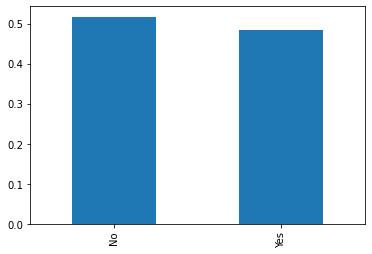

In [10]:
telco_churn.Partner.value_counts(normalize=True).plot(kind='bar');

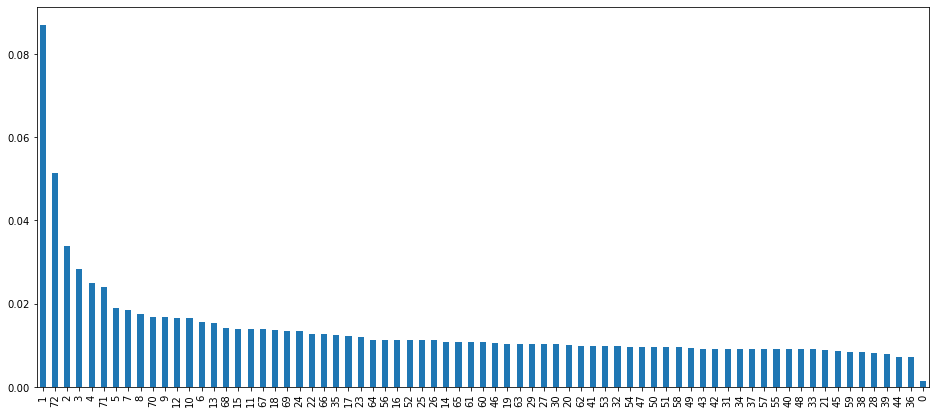

In [11]:
telco_churn.tenure.value_counts(normalize=True).plot(kind='bar',figsize=(16,7));

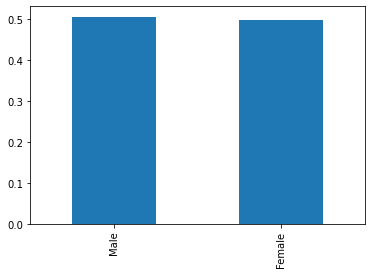

In [12]:
telco_churn.gender.value_counts(normalize=True).plot(kind='bar');


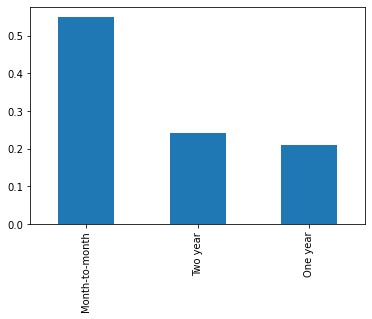

In [13]:
telco_churn.Contract.value_counts(normalize=True).plot(kind='bar');

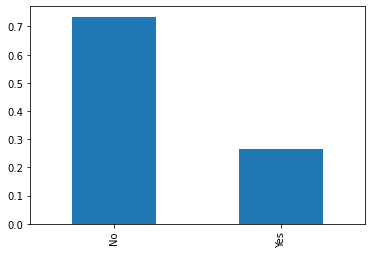

In [14]:
telco_churn.Churn.value_counts(normalize=True).plot(kind='bar');

Churn     No   Yes   All
gender                  
Female  2549   939  3488
Male    2625   930  3555
All     5174  1869  7043


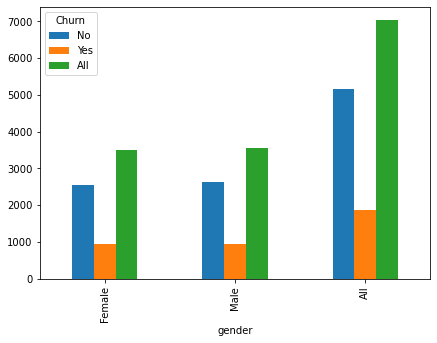

In [15]:
print(pd.crosstab(telco_churn.gender,telco_churn.Churn,margins=True))
pd.crosstab(telco_churn.gender,telco_churn.Churn,margins=True).plot(kind='bar',figsize=(7,5));

Churn             No   Yes   All
Contract                        
Month-to-month  2220  1655  3875
One year        1307   166  1473
Two year        1647    48  1695
All             5174  1869  7043


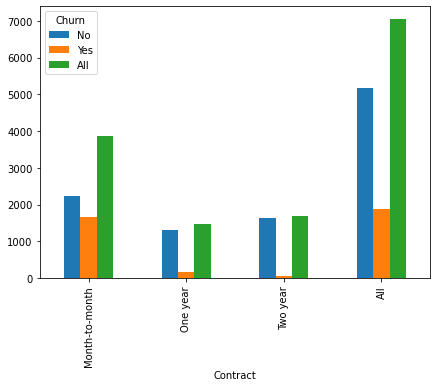

In [16]:
print(pd.crosstab(telco_churn.Contract,telco_churn.Churn,margins=True))
pd.crosstab(telco_churn.Contract,telco_churn.Churn,margins=True).plot(kind='bar',figsize=(7,5));

In [17]:
#Most of the People that Left were the Ones who had Month-to-Month Contract.

In [ ]:
sns.pairplot(telco_churn,vars = ['tenure','MonthlyCharges','TotalCharges'], hue="Churn")

2(a)People having lower tenure and higher monthly charges are tend to churn more

Churn      No   Yes   All
Partner                  
No       2441  1200  3641
Yes      2733   669  3402
All      5174  1869  7043


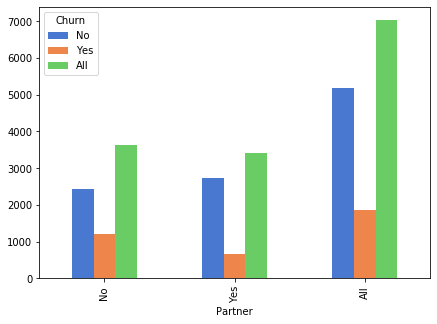

In [30]:
print(pd.crosstab(telco_churn.Partner,telco_churn.Churn,margins=True))
pd.crosstab(telco_churn.Partner,telco_churn.Churn,margins=True).plot(kind='bar',figsize=(7,5));

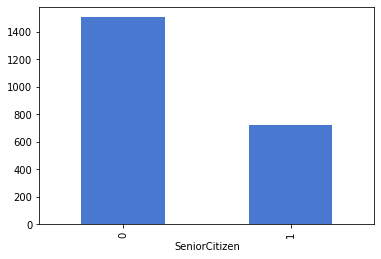

In [35]:
telco_churn.groupby('SeniorCitizen')['MonthlyCharges'].nunique().plot(kind='bar')
plt.show()

In [34]:
telco_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Churn              No   Yes   All
InternetService                  
DSL              1962   459  2421
Fiber optic      1799  1297  3096
No               1413   113  1526
All              5174  1869  7043


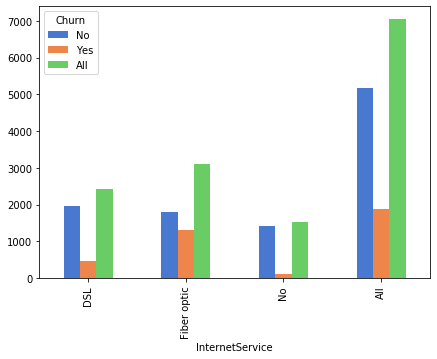

In [36]:
print(pd.crosstab(telco_churn.InternetService,telco_churn.Churn,margins=True))
pd.crosstab(telco_churn.InternetService,telco_churn.Churn,margins=True).plot(kind='bar',figsize=(7,5));

1 (a) Popular Demographics are Fiber Optics and DSL
2 (a)If the marketing team wanted to increase customer retention, to whom should they target their advertisements to?
To increase advertissement to Fiber optics team as they high rate of churning.